In [1]:
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities, _kl_divergence)
from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib import animation, rc
%matplotlib inline
rc('animation', html='html5')

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

import Utils.MatrixPlot as mp
import Utils.BuildMatrix as bm
import Utils.TaggedRowVecs as trv
import Utils.TrvPlot as trvPlt
%matplotlib inline

In [2]:
from sklearn.metrics.pairwise import pairwise_distances

In [3]:
RS = 12345
def TSNEtrv(tvs:trv.TaggedRowVecs):
    proj = TSNE(n_components=2, random_state=RS).fit_transform(tvs.row_vecs)
    return trv.TaggedRowVecs(row_vecs=proj, tags=tvs.tags)

In [40]:
RS = 12345
def TSNE_D_trv(tvs:trv.TaggedRowVecs):
    D = pairwise_distances(tvs.row_vecs, squared=True)
    proj = TSNE(n_components=2, random_state=RS, perplexity=100,
                early_exaggeration=8.).fit_transform(D)
    return trv.TaggedRowVecs(row_vecs=proj, tags=tvs.tags)

In [42]:
dimA = 100
stdDev = 0.1
numPoints = 250
num_blobs = 10

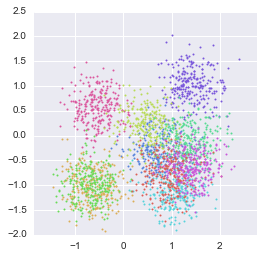

In [43]:
q = trv.Gaussians(dim=dimA, num_points=num_blobs)
tcvG = trv.Gaussians(centers=q,
                     num_points=numPoints,
                     covMatrix=np.matrix(np.diag([stdDev] * dimA)))
out = trvPlt.PlotTrvs(tcvG,
                figsize=(4,4), 
                markersize=2, 
                tag_extractor=lambda x: x[0])

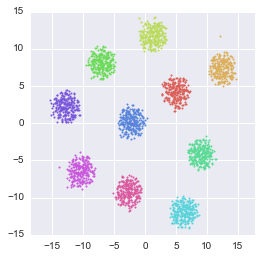

In [44]:
nout = TSNEtrv(tcvG)
out = trvPlt.PlotTrvs(nout,
                figsize=(4,4),
                markersize=2, 
                tag_extractor=lambda x: x[0])

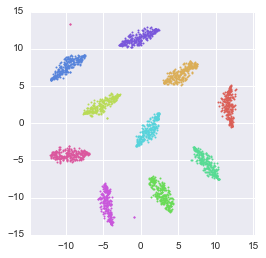

In [45]:
dout = TSNE_D_trv(tcvG)
out = trvPlt.PlotTrvs(dout,
                figsize=(4,4), 
                markersize=2,
                tag_extractor=lambda x: x[0])

In [38]:
help(TSNE)

Help on class TSNE in module sklearn.manifold.t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  t-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  to reduce the number of dimensions to a reasonable amount (e.g. 50)
 |  if the number of features is very high. This will suppress some
 |  noise and speed up the computation of pairwise distances between
 |  samples. For more tips see Laurens van der Maaten's FAQ [2].
 |  
 |  Read more in the 

In [ ]:
"""
=============================================================================
 t-SNE: The effect of various perplexity values on the shape
=============================================================================
An illustration of t-SNE on the two concentric circles and the S-curve
datasets for different perplexity values.
We observe a tendency towards clearer shapes as the preplexity value increases.
The size, the distance and the shape of clusters may vary upon initialization,
perplexity values and does not always convey a meaning.
As shown below, t-SNE for higher perplexities finds meaningful topology of
two concentric circles, however the size and the distance of the circles varies
slightly from the original. Contrary to the two circles dataset, the shapes
visually diverge from S-curve topology on the S-curve dataset even for
larger perplexity values.
For further details, "How to Use t-SNE Effectively"
http://distill.pub/2016/misread-tsne/ provides a good discussion of the
effects of various parameters, as well as interactive plots to explore
those effects.
"""

# Author: Narine Kokhlikyan <narine@slice.com>
# License: BSD

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

# Another example using s-curve
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.viridis)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.viridis)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack([
    xx.ravel().reshape(-1, 1),
    yy.ravel().reshape(-1, 1),
])
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color, cmap=plt.cm.viridis)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.viridis)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


plt.show()